In [1]:
# Carrega as bibliotecas
#!pip install nltk
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\simonato\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image

In [3]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
# Carregar arquivo de texto
f = open('posse-congresso.txt', 'r')
texto = ''
while 1:
    line = f.readline()
    if not line: break
    texto += line
f.close()

print(texto)
print(type(texto))

Excelentíssimo presidente do Congresso Nacional, senador Eunício Oliveira,

Senhoras e senhores chefes de Estado, chefes de Governo, vice-chefes de Estado e vice-chefes de Governo, que me honram com suas presenças.

Vice-presidente da República Federativa do Brasil, Hamilton Mourão, meu contemporâneo de Academia Militar de Agulhas Negras,

Presidente da Câmara dos Deputados, prezado amigo e companheiro, deputado Rodrigo Maia,

Ex-presidentes da República Federativa do Brasil, senhor José Sarney, senhor Fernando Collor de Mello,

Presidente do Supremo Tribunal Federal, ministro Dias Toffoli,

Senhoras e senhores ministros de Estado e comandantes das Forças aqui presentes,

Procuradora-Geral da República, Raquel Dodge,

Senhoras e senhores governadores,

Senhoras e senhores senadores e deputados federais,

Senhoras e senhores chefes de missões estrangeiras acreditados junto ao governo brasileiro,

Minha querida esposa Michelle, daqui vizinha Ceilândia,

Meus filhos e familiares aqui pres

In [5]:
# Quebra em palavras
tokenized_word = word_tokenize(texto)
print(tokenized_word)

['Excelentíssimo', 'presidente', 'do', 'Congresso', 'Nacional', ',', 'senador', 'Eunício', 'Oliveira', ',', 'Senhoras', 'e', 'senhores', 'chefes', 'de', 'Estado', ',', 'chefes', 'de', 'Governo', ',', 'vice-chefes', 'de', 'Estado', 'e', 'vice-chefes', 'de', 'Governo', ',', 'que', 'me', 'honram', 'com', 'suas', 'presenças', '.', 'Vice-presidente', 'da', 'República', 'Federativa', 'do', 'Brasil', ',', 'Hamilton', 'Mourão', ',', 'meu', 'contemporâneo', 'de', 'Academia', 'Militar', 'de', 'Agulhas', 'Negras', ',', 'Presidente', 'da', 'Câmara', 'dos', 'Deputados', ',', 'prezado', 'amigo', 'e', 'companheiro', ',', 'deputado', 'Rodrigo', 'Maia', ',', 'Ex-presidentes', 'da', 'República', 'Federativa', 'do', 'Brasil', ',', 'senhor', 'José', 'Sarney', ',', 'senhor', 'Fernando', 'Collor', 'de', 'Mello', ',', 'Presidente', 'do', 'Supremo', 'Tribunal', 'Federal', ',', 'ministro', 'Dias', 'Toffoli', ',', 'Senhoras', 'e', 'senhores', 'ministros', 'de', 'Estado', 'e', 'comandantes', 'das', 'Forças', 'aq

In [6]:
# Palavras em letras minúsculas
tokenized_word2 = [w.lower() for w in tokenized_word]
print(tokenized_word2)

['excelentíssimo', 'presidente', 'do', 'congresso', 'nacional', ',', 'senador', 'eunício', 'oliveira', ',', 'senhoras', 'e', 'senhores', 'chefes', 'de', 'estado', ',', 'chefes', 'de', 'governo', ',', 'vice-chefes', 'de', 'estado', 'e', 'vice-chefes', 'de', 'governo', ',', 'que', 'me', 'honram', 'com', 'suas', 'presenças', '.', 'vice-presidente', 'da', 'república', 'federativa', 'do', 'brasil', ',', 'hamilton', 'mourão', ',', 'meu', 'contemporâneo', 'de', 'academia', 'militar', 'de', 'agulhas', 'negras', ',', 'presidente', 'da', 'câmara', 'dos', 'deputados', ',', 'prezado', 'amigo', 'e', 'companheiro', ',', 'deputado', 'rodrigo', 'maia', ',', 'ex-presidentes', 'da', 'república', 'federativa', 'do', 'brasil', ',', 'senhor', 'josé', 'sarney', ',', 'senhor', 'fernando', 'collor', 'de', 'mello', ',', 'presidente', 'do', 'supremo', 'tribunal', 'federal', ',', 'ministro', 'dias', 'toffoli', ',', 'senhoras', 'e', 'senhores', 'ministros', 'de', 'estado', 'e', 'comandantes', 'das', 'forças', 'aq

In [7]:
# Aqui, vamos retirar as chamadas stopwords (conjuncoes, preposicoes, palavras que não nos interessam)
# 1) Vamos ver quais stopwords ja existem na biblioteca
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))
print(stop_words)

{'com', 'eles', 'sua', 'que', 'estavam', 'no', 'vos', 'tiver', 'estes', 'será', 'hajam', 'aquela', 'somos', 'estamos', 'tinham', 'eu', 'tivéssemos', 'para', 'eram', 'houvera', 'tive', 'minha', 'teus', 'seriam', 'teve', 'seja', 'na', 'como', 'sou', 'houveríamos', 'esse', 'ou', 'uma', 'houverão', 'ela', 'tiveram', 'lhes', 'você', 'teu', 'elas', 'seremos', 'estiverem', 'estivera', 'quando', 'haja', 'dele', 'do', 'nosso', 'hei', 'essa', 'terei', 'à', 'estávamos', 'num', 'tínhamos', 'tivesse', 'tivessem', 'tem', 'aqueles', 'vocês', 'seu', 'suas', 'foram', 'formos', 'tuas', 'isso', 'está', 'tinha', 'forem', 'nós', 'este', 'estivesse', 'nossos', 'seria', 'tivermos', 'tenho', 'fomos', 'delas', 'esta', 'muito', 'as', 'houver', 'de', 'numa', 'se', 'tua', 'estou', 'era', 'estava', 'tém', 'serei', 'tivemos', 'mais', 'tenha', 'às', 'houvessem', 'ao', 'das', 'terá', 'estiver', 'houvéssemos', 'fora', 'fosse', 'aos', 'sem', 'estiveram', 'temos', 'terão', 'serão', 'houverei', 'lhe', 'só', 'sejam', 'nos

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simonato\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# 2) Vamos adicionar novas stopwords
stop_words.update(('uso',',',';','%','.',':', '***','-','droga','drogas','art.','–','http', '!'))
print(stop_words)

{'com', 'eles', 'sua', 'que', 'estavam', 'no', 'vos', 'tiver', 'estes', '!', 'será', 'hajam', 'aquela', 'somos', 'estamos', 'tinham', 'eu', 'tivéssemos', 'para', 'eram', 'houvera', 'tive', 'minha', 'teus', 'seriam', '%', 'teve', 'seja', 'na', 'como', 'sou', 'houveríamos', 'esse', 'ou', 'uma', 'houverão', 'ela', 'tiveram', 'lhes', 'você', 'teu', 'elas', 'seremos', 'estiverem', 'art.', 'estivera', 'quando', 'haja', 'dele', 'do', 'nosso', 'hei', 'essa', 'terei', 'à', 'estávamos', 'num', 'tínhamos', 'tivesse', 'tivessem', 'tem', 'aqueles', 'vocês', 'seu', 'suas', 'foram', ',', 'droga', 'formos', 'tuas', 'isso', 'está', 'drogas', 'tinha', 'forem', 'nós', 'este', 'estivesse', 'nossos', 'seria', 'tivermos', 'tenho', 'fomos', 'delas', 'esta', 'muito', 'as', 'houver', 'de', 'numa', 'se', 'tua', 'estou', 'era', 'estava', ';', 'tém', 'serei', 'tivemos', 'mais', 'tenha', '–', 'às', 'houvessem', 'ao', 'das', 'terá', 'estiver', 'houvéssemos', 'fora', 'fosse', 'aos', 'sem', 'estiveram', 'temos', 'ter

In [9]:
# Remover essas stopwords
tokenized_word_3 = []
for w in tokenized_word2:
    if w not in stop_words:
        tokenized_word_3.append(w)

In [10]:
# Analisa a distribuição das palavras
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word_3)
fdist.most_common(20)

[('brasil', 13),
 ('nacional', 7),
 ('senhoras', 6),
 ('senhores', 6),
 ('deus', 6),
 ('estado', 5),
 ('aqui', 5),
 ('brasileiros', 5),
 ('povo', 5),
 ('todos', 5),
 ('presidente', 4),
 ('governo', 4),
 ('república', 4),
 ('brasileiro', 4),
 ('casa', 4),
 ('missão', 4),
 ('trabalho', 4),
 ('ser', 4),
 ('acima', 4),
 ('política', 4)]

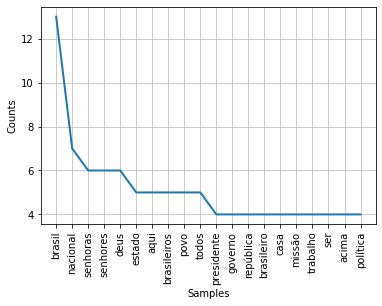

In [13]:
# Gráfico de distribuiçao de palavras
import matplotlib.pyplot as plt
plt.figure()
fdist.plot(20,cumulative=False)

In [14]:
# Wordcloud
wc = WordCloud()
img = wc.generate_from_text(' '.join(tokenized_word_3))
img.to_file('posse.jpeg')